In [8]:
!pip install psycopg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.4/179.4 kB 2.5 MB/s eta 0:00:00a 0:00:01


In [18]:
from pymeos.db.psycopg import MobilityDB
from pymeos import *
from datetime import datetime, timedelta
import time

In [19]:

class mobDB:
    """
    Singleton class used to connect to the MobilityDB database and retrieve the MMSI of ships and their trajectories.
    """
    
    def __init__(self):
        connection_params = {
        "host": "localhost",
        "port": 5432,
        "dbname": "mobilitydb",
        "user": "postgres",
        "password": "postgres"
        }
        try: 
            
            self.connection = MobilityDB.connect(**connection_params)

            self.cursor = self.connection.cursor()

            self.cursor.execute(f"SELECT MMSI FROM public.PyMEOS_demo;")
            self.mmsi_list = self.cursor.fetchall()
        except Exception as e:
            print(e)

    def getMMSI(self, percentage=0.001):
        return self.mmsi_list[:int(len(self.mmsi_list)*percentage)]

    def getTrajectories(self, mmsi_list, pstart, pend):
        try:
            rows={}
            for mmsi in mmsi_list:
                ship_mmsi = mmsi[0]
                self.cursor.execute(f"SELECT attime(a.trajectory::tgeompoint,span('{pstart}'::timestamptz, '{pend}'::timestamptz, true, true))::tgeompoint FROM public.PyMEOS_demo as a WHERE a.MMSI = {ship_mmsi} ;")
                trajectory = self.cursor.fetchone()
                rows[mmsi] = trajectory[0]

            return rows
        except Exception as e:
            print(e)


    def close(self):
        self.cursor.close()
        self.connection.close()

In [20]:
start_date = datetime(2023, 6, 1, 0, 0, 0)
time_delta = timedelta(minutes=1)
timestamps = [start_date + i * time_delta for i in range(1440)]
timestamps_strings = [dt.strftime('%Y-%m-%d %H:%M:%S') for dt in timestamps]


In [21]:
PERCENTAGE_OF_SHIPS = 0.01 # To not overload the memory, we only take a percentage of the ships in the database
FRAMES_FOR_30_FPS = 48 # Number of frames needed for a 30 FPS animation 


db  = mobDB()
percentage = PERCENTAGE_OF_SHIPS

In [22]:
pymeos_initialize()
mmsi_list = db.getMMSI(percentage)
rows = db.getTrajectories(mmsi_list)


In [24]:



# features = {Timestamp1 : [(x1,y1), (x2,y2), ...], Timestamp2 : [(x1,y1), (x2,y2), ...], ...}
features = {str(dt): [] for dt in timestamps}

for mmsi in mmsi_list:
    for datetime in timestamps:
        try :
            val = rows[mmsi].value_at_timestamp(datetime)
            features[datetime.strftime('%Y-%m-%d %H:%M:%S')].append((val.x, val.y))
        except Exception as e: 
            val = None


In [25]:
features

{'2023-06-01 00:00:00': [(12.3227, 56.1102)],
 '2023-06-01 00:01:00': [(8.42333, 55.4718),
  (12.3227, 56.1102),
  (8.565366, 55.0871),
  (11.871924137931035, 56.76009310344828),
  (10.9235, 56.4151),
  (12.2011, 55.4702),
  (4.92624909090909, 55.140027272727274),
  (10.8509, 55.64276363636363),
  (12.2118, 54.5623)],
 '2023-06-01 00:02:00': [(8.42335, 55.4718),
  (12.3227, 56.11019),
  (8.56537, 55.0871),
  (11.869424137931034, 56.75649310344828),
  (10.9235, 56.4151),
  (10.5227, 54.8542),
  (11.9629, 57.71282),
  (12.2011, 55.4702),
  (4.92564, 55.143027272727274),
  (10.850445454545454, 55.64461818181818),
  (12.2104, 54.5596),
  (5.486534333333333, 53.528800000000004)],
 '2023-06-01 00:03:00': [(8.423345999999999, 55.4718),
  (12.3227, 56.11015666666667),
  (8.56536, 55.0871),
  (11.86725, 56.75273333333333),
  (10.9235, 56.4151),
  (10.5227, 54.8542),
  (11.96054705882353, 57.71123529411765),
  (12.2011, 55.4702),
  (4.925066363636364, 55.146072727272724),
  (10.850045454545453, 

In [26]:
db.close()

In [36]:
from datetime import datetime, timedelta
import time
connection_params = {
        "host": "localhost",
        "port": 5432,
        "dbname": "mobilitydb",
        "user": "postgres",
        "password": "postgres"
        }
connection = MobilityDB.connect(**connection_params)
cursor = connection.cursor()
cursor.execute(f"SELECT attime(a.trajectory::tgeompoint,span('2023-06-01 00:00:00'::timestamptz, '2023-06-01 07:00:00'::timestamptz, true, true))::tgeompoint FROM public.PyMEOS_demo as a WHERE a.MMSI = {5322} ;")
trajectory = cursor.fetchone()
#rows[mmsi] = trajectory

In [37]:
trajectory

(TGeomPointSeq([POINT(12.6059 55.6845)@2023-06-01 01:06:32+02, POINT(12.6059 55.6845)@2023-06-01 01:06:34+02, POINT(12.606 55.6845)@2023-06-01 01:06:36+02, POINT(12.606 55.6845)@2023-06-01 01:08:18+02, POINT(12.606 55.6844)@2023-06-01 01:08:20+02, POINT(12.606 55.6844)@2023-06-01 01:08:52+02, POINT(12.6061 55.6844)@2023-06-01 01:08:54+02, POINT(12.6061 55.6844)@2023-06-01 01:09:14+02, POINT(12.6061 55.6845)@2023-06-01 01:09:16+02, POINT(12.6061 55.6845)@2023-06-01 01:09:24+02, POINT(12.606 55.6845)@2023-06-01 01:09:28+02, POINT(12.606 55.6845)@2023-06-01 01:10:06+02, POINT(12.606 55.6846)@2023-06-01 01:10:08+02, POINT(12.606 55.6846)@2023-06-01 01:10:12+02, POINT(12.6059 55.6846)@2023-06-01 01:10:14+02, POINT(12.6059 55.6846)@2023-06-01 01:10:56+02, POINT(12.6059 55.6845)@2023-06-01 01:10:58+02, POINT(12.6059 55.6845)@2023-06-01 01:11:12+02, POINT(12.6059 55.6844)@2023-06-01 01:11:14+02, POINT(12.6059 55.6844)@2023-06-01 01:11:20+02, POINT(12.6058 55.6843)@2023-06-01 01:11:22+02, POINT

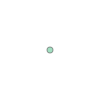

In [38]:
trajectory[0].value_at_timestamp(datetime(2023, 6, 1, 6, 30, 0))

In [17]:
cursor.close()
connection.close()